In [1]:
import  math
import numpy as np
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'



datadir="data/"
Sherpa_MEPSatNLO=yoda.readYODA(datadir+"Sherpa/Jets/nlops.yoda")
Sherpa_PSatLO=yoda.readYODA(datadir+"Sherpa/Jets/lops.yoda")

H7_NLO_PS=yoda.readYODA(datadir+"Herwig/Jets/NLOPS_C_HtHat_shhalf.yoda")
H7_LO_PS=yoda.readYODA(datadir+"Herwig/Jets/LOPS_C_HtHat_shhalf.yoda")


POWHEG=yoda.readYODA(datadir+"POWHEG/JJ/incl.yoda")





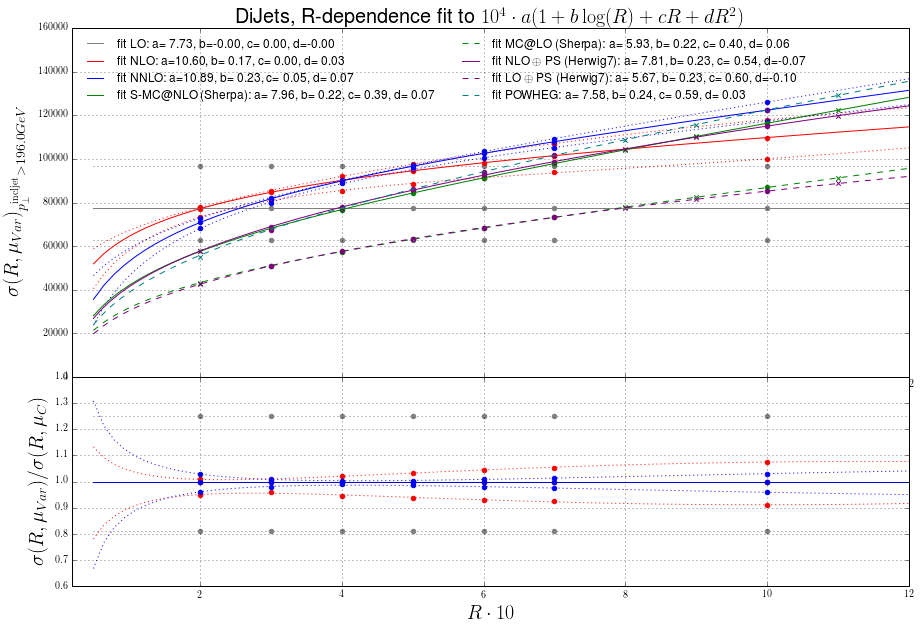

In [2]:
plt.clf()
from scipy.optimize import curve_fit
def func(x, a, b, c,d):
    return 10000.*a*(1. + b*np.log(x) + c*x + d*x**2)

orders=["LO","NLO","NNLO"]
colors=["grey","red","blue"]

fig=plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 1,height_ratios= [1,0.6])
gs.update(wspace=0.0, hspace=0.0)
ax1     = plt.subplot(gs[0, 0])
ax2     = plt.subplot(gs[1, 0])

startingBin=4


# also works for scatters:
def integrateYoda(a,start):
    return sum((np.array(a.yVals())*(np.array(a.xMaxs())-np.array(a.xMins())))[start:])




NNLOJET_LO=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_LO.yoda")
NNLOJET_NLO=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NLO.yoda")
NNLOJET_NNLO=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NNLO.yoda")

NNLOJET_LO_E1=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_LO_env1.yoda")
NNLOJET_NLO_E1=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NLO_env1.yoda")
NNLOJET_NNLO_E1=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NNLO_env1.yoda")

NNLOJET_LO_E2=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_LO_env2.yoda")
NNLOJET_NLO_E2=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NLO_env2.yoda")
NNLOJET_NNLO_E2=yoda.readYODA(datadir+"NNLOJET/JJ/NNLOJET_NNLO_env2.yoda")



Rs=["2","3","4","5","6","7","10"]

for order,color in zip([[NNLOJET_LO,NNLOJET_LO_E1,NNLOJET_LO_E2,"LO"],
                              [NNLOJET_NLO,NNLOJET_NLO_E1,NNLOJET_NLO_E2,"NLO"],
                              [NNLOJET_NNLO,NNLOJET_NNLO_E1,NNLOJET_NNLO_E2,"NNLO"]],colors): 

  NNLOJET=order[0]
  NNLOJET1=order[1]
  NNLOJET2=order[2]
  yc_line=[]

  y1_line=[]
  y2_line=[]
  y3_line=[]
  y4_line=[]
  y5_line=[]
  y6_line=[]
  for R in Rs:
    x=np.array(NNLOJET["/CMS_RAD/d01-x01-y01-AK4"].xVals())[startingBin:]
    yc_line+=[integrateYoda(NNLOJET['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]
    y1_line+=[integrateYoda(NNLOJET1['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET1['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET1['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET1['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]
    y2_line+=[integrateYoda(NNLOJET2['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET2['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET2['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(NNLOJET2['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]

  for line in [yc_line,y1_line,y2_line]:
      RsN=np.array([0.2,0.3,0.4,0.5,0.6,0.7,1.0])
        
      popt, pcov = curve_fit(func, RsN, line)
      RsNext=np.linspace(0.05,1.5,100)
      if line==yc_line:  
        ax1.plot(RsNext*10., func(RsNext, *popt), 'r-',
         label='fit %s: a=%5.2f, b=%5.2f, c=%5.2f, d=%5.2f' % (tuple([order[3]]+list(popt))),color=color)
      else:
        ax1.plot(RsNext*10., func(RsNext, *popt),ls='dotted',color=color)
      ax1.scatter(RsN*10.,line,color=color)
    
      popt_C, pcov_C = curve_fit(func, RsN, np.array(yc_line))
      
      if line==yc_line: 
        ax2.plot(RsNext*10., np.array(func(RsNext, *popt))/np.array(func(RsNext, *popt_C)), 'r-',color=color) 
      else:
        ax2.plot(RsNext*10., np.array(func(RsNext, *popt))/np.array(func(RsNext, *popt_C)),ls='dotted',color=color) 
      ax2.scatter(RsN*10.,np.array(line)/np.array(yc_line),color=color)
    

    
PS= Sherpa_MEPSatNLO

NNLOK =1.
Rs=["3","4","5","6","7","10"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    yc_lineps+=[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]
RsN=np.array([0.3,0.4,0.5,0.6,0.7,1.0])
ax1.scatter([RsN*10.],[yc_lineps],color="green")
popt, pcov = curve_fit(func, RsN, yc_lineps)
RsNext=np.linspace(0.05,1.3,100)
ax1.plot(RsNext*10., func(RsNext, *popt), 'r-',
         label='fit S-MC@NLO (Sherpa): a=%5.2f, b=%5.2f, c=%5.2f, d=%5.2f' % (tuple(list(popt))),color="green")
Rs=["8","9","11","2"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    ax1.scatter([float(R)],[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)],c="green",marker="x")


PS= Sherpa_PSatLO

NNLOK =1.
Rs=["3","4","5","6","7","10"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    yc_lineps+=[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]
RsN=np.array([0.3,0.4,0.5,0.6,0.7,1.0])
ax1.scatter([RsN*10.],[yc_lineps],color="green")
popt, pcov = curve_fit(func, RsN, yc_lineps)
RsNext=np.linspace(0.05,1.3,100)
ax1.plot(RsNext*10., func(RsNext, *popt), 'r-',
         label='fit MC@LO (Sherpa): a=%5.2f, b=%5.2f, c=%5.2f, d=%5.2f' % (tuple(list(popt))),color="green",ls="dashed")
Rs=["8","9","11","2"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    ax1.scatter([float(R)],[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)],c="green",marker="x")

    
    
    
PS= H7_NLO_PS

NNLOK =1.
Rs=["3","4","5","6","7","10"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    yc_lineps+=[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]
RsN=np.array([0.3,0.4,0.5,0.6,0.7,1.0])
ax1.scatter([RsN*10.],[yc_lineps],color="purple")
popt, pcov = curve_fit(func, RsN, yc_lineps)
RsNext=np.linspace(0.05,1.3,100)
ax1.plot(RsNext*10., func(RsNext, *popt), 'r-',
         label='fit NLO $\oplus$ PS (Herwig7): a=%5.2f, b=%5.2f, c=%5.2f, d=%5.2f' % (tuple(list(popt))),color="purple")
Rs=["8","9","11","2"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    ax1.scatter([float(R)],[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)],c="purple",marker="x")


PS= H7_LO_PS


Rs=["3","4","5","6","7","10"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    yc_lineps+=[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]
RsN=np.array([0.3,0.4,0.5,0.6,0.7,1.0])
ax1.scatter([RsN*10.],[yc_lineps],color="purple")
popt, pcov = curve_fit(func, RsN, yc_lineps)
RsNext=np.linspace(0.05,1.3,100)
ax1.plot(RsNext*10., func(RsNext, *popt), 'r-',
         label='fit LO $\oplus$ PS (Herwig7): a=%5.2f, b=%5.2f, c=%5.2f, d=%5.2f' % (tuple(list(popt))),color="purple",ls="dashed")
Rs=["8","9","11","2"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    ax1.scatter([float(R)],[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)],c="purple",marker="x")

    
    

    
PS=POWHEG
    

Rs=["3","4","5","6","7","10"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    yc_lineps+=[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)]
RsN=np.array([0.3,0.4,0.5,0.6,0.7,1.0])
ax1.scatter([RsN*10.],[yc_lineps],color="purple")
popt, pcov = curve_fit(func, RsN, yc_lineps)
RsNext=np.linspace(0.05,1.3,100)
ax1.plot(RsNext*10., func(RsNext, *popt), 'r-',
         label='fit POWHEG: a=%5.2f, b=%5.2f, c=%5.2f, d=%5.2f' % (tuple(list(popt))),color="teal",ls="dashed")
Rs=["8","9","11","2"]
yc_lineps=[]
for R in Rs:
    obs="J1_pT_R%s"%R
    ax1.scatter([float(R)],[integrateYoda(PS['/CMS_RAD/d01-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d02-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d03-x01-y01-AK%s'%R],startingBin)+\
              integrateYoda(PS['/CMS_RAD/d04-x01-y01-AK%s'%R],startingBin)],c="teal",marker="x")
    
    
ax1.xaxis.set_ticks_position("both")
ax1.xaxis.set_tick_params(direction="in",which="both")
ax2.xaxis.set_ticks_position("both")
ax2.xaxis.set_tick_params(direction="in",which="both")
ax1.yaxis.set_ticks_position("both")
ax1.yaxis.set_tick_params(direction="in",which="both")
ax2.yaxis.set_ticks_position("both")
ax2.yaxis.set_tick_params(direction="in",which="both")

ax1.grid(linestyle='dotted');
ax2.grid(linestyle='dotted');


    

    
#ax1.plot([8.8,8.8],[0.06,0.13],c="black")
#ax1.plot([7.,7.],[0.06,0.13],c="black")


ax1.legend(frameon=False,loc="upper left",ncol=2,fontsize=12)
ax1.set_xlim([0.2,12])
ax2.set_xlim([0.2,12])
#ax1.set_ylim([0.01,15000])

ax1.set_title("DiJets, R-dependence fit to $10^4\cdot a(1+b \log(R)+ c R+d R^2)$",fontsize=20)
ax2.set_xlabel("$R \cdot 10$",fontsize=20)


A=PS["/CMS_RAD/d01-x01-y01-AK4"].xMins()[startingBin]
ax1.set_ylabel("$\sigma(R ,\mu_{Var})_{p^{\mathrm{incl jet}}_\perp > %sGeV} $"%A,fontsize=20)



ax2.set_ylabel("$\sigma(R ,\mu_{Var})/\sigma(R ,\mu_C) $",fontsize=20)
fig.savefig("Fig_V_17_InclJet_%s.pdf"%A)
plt.show()